In [23]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from ecpaper_utils import linfit_utils as linfit

importlib.reload(linfit)

<module 'ecpaper_utils.linfit_utils' from '/home/islas/python/ecpaper2020/ecpaper_utils/linfit_utils.py'>

In [24]:
cmip5jlats="/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/jlatcmip5.nc"
cmip5errors="../ERRORCALC/JLAT/DATA/errors_cmip5.nc"
obsjlat="/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/jlatobs.nc"

In [25]:
jlat5=xr.open_dataset(cmip5jlats)
error5=xr.open_dataset(cmip5errors)
jlatobs=xr.open_dataset(obsjlat)

Calculate CMIP5 regression coefficients and correlation

In [26]:
jlatp5 = jlat5['jlatemp']
jlatdif5 = jlat5['jlatemf']-jlat5['jlatemp']
sigy5 = error5['sigy']
sigx5 = error5['sigx']

aols, bols = linfit.linfit_xy(jlatp5,jlatdif5, sigma=sigy5)
atls, btls = linfit.tls(jlatp5, jlatdif5, sigx5, sigy5)
ablrall, bblrall, del2all, muxall, delx2all = linfit.blr(jlatp5, jlatdif5, sigx5, sigy5, rxy5, iseed=3)
ablr = np.mean(ablrall) ; bblr = np.mean(bblrall)

corcmip5=np.array(xr.corr(jlatp5, jlatdif5))
corcmip5str='{0:6.2f}'.format(corcmip5).strip()

Set up plot characteristics

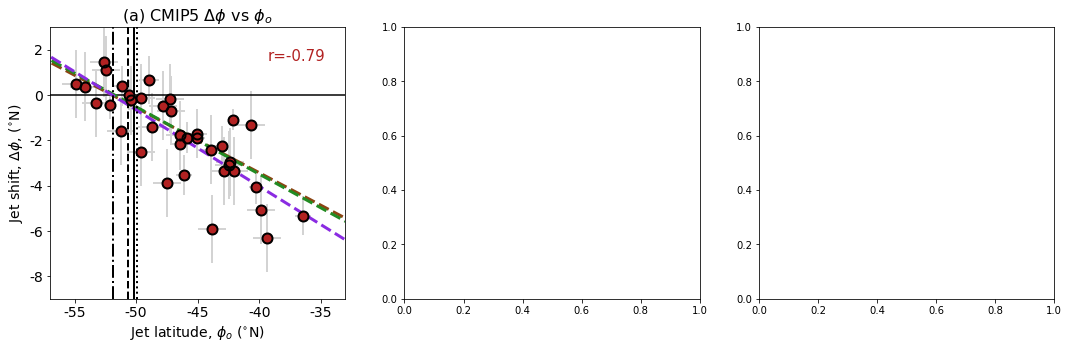

In [27]:
# set up the plot characteristics
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,5)

# plot the CMIP5 model scatter plot

# error bars
yerr = 1.96*sigy5
xerr = 1.96*sigx5

# zero line
axs[0].plot([-57,-33],[0,0], color="black")

# OLS regression
x = np.arange(-58,-22,1)
y = aols+bols*x
axs[0].plot(x,y, color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls+btls*x
axs[0].plot(x,y, color='forestgreen', linewidth=3, linestyle='dashed')

# BLR regression
y = ablr + bblr*x
axs[0].plot(x,y, color='blueviolet', linewidth=3, linestyle='dashed')


axs[0].plot([jlatobs["jlatera5"], jlatobs["jlatera5"]],[-9,3], color="black", linewidth=2)
axs[0].plot([jlatobs["jlaterai"], jlatobs["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
axs[0].plot([jlatobs["jlatjra"], jlatobs["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
axs[0].plot([jlatobs["jlatmerra"], jlatobs["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)
axs[0].plot(jlatp5, jlatdif5,"o", color='firebrick', markersize=10)
axs[0].plot(jlatp5, jlatdif5,"o", color='black', markersize=10, fillstyle='none', mew=2)
axs[0].set_xlabel("Jet latitude, $\phi_{o}$ ($^{\circ}$N)", fontsize=14)
axs[0].set_ylabel("Jet shift, $\Delta \phi$, ($^{\circ}$N)", fontsize=14)
axs[0].set_title("(a) CMIP5 $\Delta \phi$ vs $\phi_{o}$", fontsize=16)
axs[0].set_xlim(-57,-33)
axs[0].set_ylim(-9,3)
axs[0].set_xticks([-55,-50,-45,-40,-35])
axs[0].set_xticklabels(['-55','-50','-45','-40','-35'], fontsize=14)
axs[0].set_yticks([-8,-6,-4,-2,0,2])
axs[0].set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
axs[0].text(-37,1.7,"r="+corcmip5str, horizontalalignment='center', verticalalignment='center', fontsize=15, color='firebrick')

#axs[0].plot([jlatp[0]-1, jlatp[0]+1], [jlatdif[0],jlatdif[0]] )
axs[0].errorbar(jlatp5,jlatdif5,yerr = yerr, linestyle="None", color='lightgrey', linewidth=2)
axs[0].errorbar(jlatp5,jlatdif5,xerr = xerr, linestyle="None", color='lightgrey', linewidth=2)

plt.show()